# Deep Learning with PyTorch Step-by-Step: A Beginner's Guide


### Jupyter Notebook in VS Code

From directory with virtual environment in it, use this terminal command to use Jupyter Notebook in VS Code:

jupyter notebook --NotebookApp.allow_origin='*' --NotebookApp.ip='0.0.0.0'

### Select Python Interpreter

Open Command Palette as follows: Ctrl+Shift+P

Then select from VS Code Command Palette: "Python: Select Interpreter" and choose the same Python interpreter that you used to install Jupyter.

If server not shown, enter server manually as follows: 
http://localhost:8888

Reminder:  pw: ""

# Chapter 1

In [4]:
try:
    import google.colab
    import requests
    url = 'https://raw.githubusercontent.com/dvgodoy/PyTorchStepByStep/master/config.py'
    r = requests.get(url, allow_redirects=True)
    open('config.py', 'wb').write(r.content)    
except ModuleNotFoundError:
    pass

from config import *
config_chapter1()
# This is needed to render the plots in this chapter
from plots.chapter1 import *

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression

import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

# A Simple Regression Problem

$$
\Large y = b + w x + \epsilon
$$

## Data Generation

### Synthetic Data Generation

In [8]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
# Generate N random numbers between 0 and 1
x = np.random.rand(N, 1)
# Generate noise with mean 0 and std 0.1
epsilon = (.1 * np.random.randn(N, 1))

# Generate y using the linear equation y = b + w * x + noise
y = true_b + true_w * x + epsilon

### Cell 1.1

In [9]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Generated Data - Train'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': 'Generated Data - Validation'}, xlabel='x', ylabel='y'>],
       dtype=object))

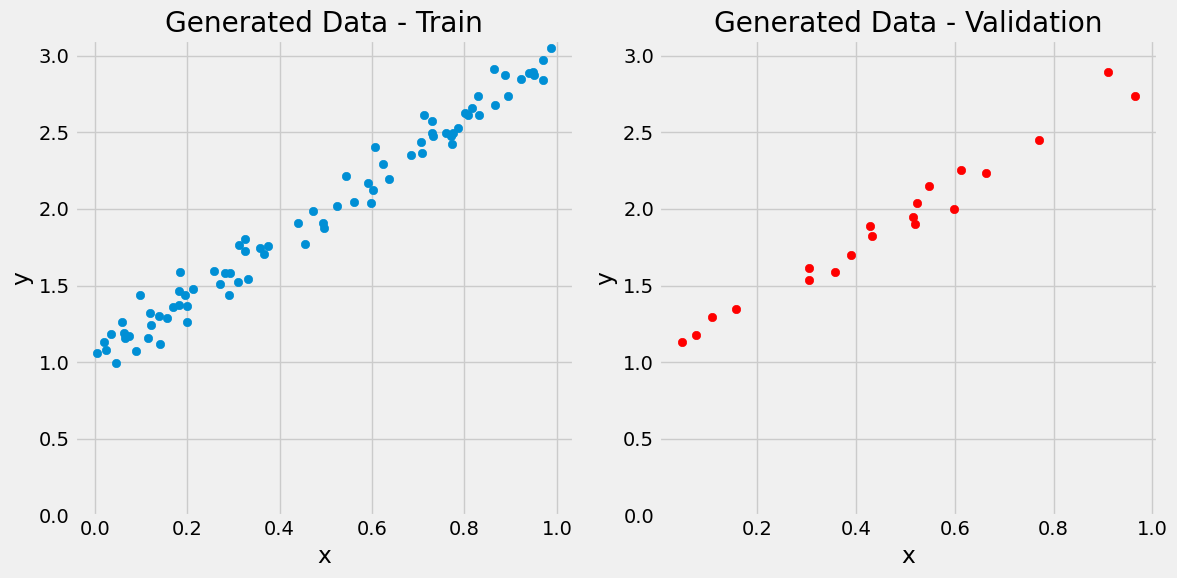

In [10]:
figure1(x_train, y_train, x_val, y_val)

# Gradient Descent

## Step 0: Random Initialization

In [11]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


## Step 1: Compute Model's Predictions

In [12]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train

## Step 2: Compute the Loss

In [13]:
# Step 2 - Computing the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = (yhat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()

print(loss)

2.7421577700550976


## Step 3: Compute the Gradients

In [14]:
# Step 3 - Computes gradients for both "b" and "w" parameters
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


## Step 4: Update the Parameters

In [15]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1
print(b, w)

# Step 4 - Updates parameters using gradients and 
# the learning rate
b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


## Step 5: Rinse and Repeat!

In [16]:
# Go back to Step 1 and run observe how your parameters b and w change

# Linear Regression in Numpy

### Cell 1.2

In [17]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train
    
    # Step 2 - Computes the loss
    # We are using ALL data points, so this is BATCH gradient
    # descent. How wrong is our model? That's the error!   
    error = (yhat - y_train)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()
    
    # Step 3 - Computes gradients for both "b" and "w" parameters
    b_grad = 2 * error.mean()
    w_grad = 2 * (x_train * error).mean()
    
    # Step 4 - Updates parameters using gradients and 
    # the learning rate
    b = b - lr * b_grad
    w = w - lr * w_grad
    
print(b, w)

[0.49671415] [-0.1382643]
[1.02354094] [1.96896411]


In [18]:
# Sanity Check: do we get the same results as our
# gradient descent?
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[1.02354075] [1.96896447]


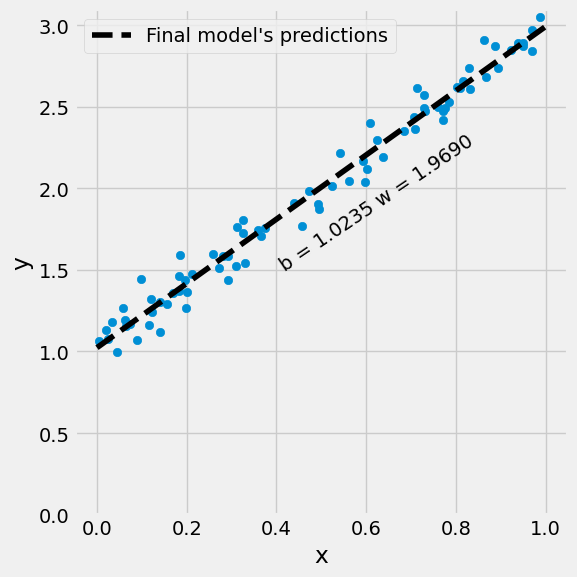

In [19]:
fig = figure3(x_train, y_train)

# PyTorch

## Tensor

In [20]:
scalar = torch.tensor(3.14159)
vector = torch.tensor([1, 2, 3])
matrix = torch.ones((2, 3), dtype=torch.float)
tensor = torch.randn((2, 3, 4), dtype=torch.float)

print(scalar)
print(vector)
print(matrix)
print(tensor)

tensor(3.1416)
tensor([1, 2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[[ 1.9589,  0.7475,  0.0936,  0.3364],
         [-0.1000,  0.5183,  0.4415,  0.6028],
         [-0.7008, -0.3229,  1.0653, -0.1409]],

        [[-1.4539, -0.6883, -0.2097, -1.3265],
         [ 1.7690,  1.5328,  1.0906,  0.6315],
         [-0.8290, -0.5520,  1.3474,  0.2183]]])


In [21]:
print(tensor.size(), tensor.shape)

torch.Size([2, 3, 4]) torch.Size([2, 3, 4])


In [22]:
print(scalar.size(), scalar.shape)

torch.Size([]) torch.Size([])


In [23]:
# We get a tensor with a different shape but it still is
# the SAME tensor
same_matrix = matrix.view(1, 6)
# If we change one of its elements...
same_matrix[0, 1] = 2.
# It changes both variables: matrix and same_matrix
print(matrix)
print(same_matrix)

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 2., 1., 1., 1., 1.]])


In [24]:
# We can use "new_tensor" method to REALLY copy it into a new one
different_matrix = matrix.new_tensor(matrix.view(1, 6))
# Now, if we change one of its elements...
different_matrix[0, 1] = 3.
# The original tensor (matrix) is left untouched!
# But we get a "warning" from PyTorch telling us 
# to use "clone()" instead!
print(matrix)
print(different_matrix)

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 3., 1., 1., 1., 1.]])


/tmp/ipykernel_496409/1277334554.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  different_matrix = matrix.new_tensor(matrix.view(1, 6))


In [25]:
# Lets follow PyTorch's suggestion and use "clone" method
another_matrix = matrix.view(1, 6).clone().detach()
# Again, if we change one of its elements...
another_matrix[0, 1] = 4.
# The original tensor (matrix) is left untouched!
print(matrix)
print(another_matrix)

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 4., 1., 1., 1., 1.]])


## Loading Data, Devices and CUDA

In [26]:
x_train_tensor = torch.as_tensor(x_train)
x_train.dtype, x_train_tensor.dtype

(dtype('float64'), torch.float64)

In [27]:
float_tensor = x_train_tensor.float()
float_tensor.dtype

torch.float32

In [28]:
dummy_array = np.array([1, 2, 3])
dummy_tensor = torch.as_tensor(dummy_array)
# Modifies the numpy array
dummy_array[1] = 0
# Tensor gets modified too...
dummy_tensor

tensor([1, 0, 3])

In [29]:
dummy_tensor.numpy()

array([1, 0, 3])

### Defining your device

In [31]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [32]:
n_cudas = torch.cuda.device_count()
for i in range(n_cudas):
    print(torch.cuda.get_device_name(i))

Quadro M5000M


In [33]:
gpu_tensor = torch.as_tensor(x_train).to(device)
gpu_tensor[0]

RuntimeError: CUDA error: CUDA-capable device(s) is/are busy or unavailable
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


### Cell 1.3

In [28]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Our data was in Numpy arrays, but we need to transform them 
# into PyTorch's Tensors and then we send them to the 
# chosen device
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

In [29]:
# Here we can see the difference - notice that .type() is more
# useful since it also tells us WHERE the tensor is (device)
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.FloatTensor


In [30]:
back_to_numpy = x_train_tensor.numpy()

In [31]:
back_to_numpy = x_train_tensor.cpu().numpy()

## Creating Parameters

In [32]:
# FIRST
# Initializes parameters "b" and "w" randomly, ALMOST as we
# did in Numpy since we want to apply gradient descent on
# these parameters we need to set REQUIRES_GRAD = TRUE
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
w = torch.randn(1, requires_grad=True, dtype=torch.float)
print(b, w)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [33]:
# SECOND
# But what if we want to run it on a GPU? We could just
# send them to device, right?
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
w = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
print(b, w)
# Sorry, but NO! The to(device) "shadows" the gradient...

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [34]:
# THIRD
# We can either create regular tensors and send them to
# the device (as we did with our data)
torch.manual_seed(42)
b = torch.randn(1, dtype=torch.float).to(device)
w = torch.randn(1, dtype=torch.float).to(device)
# and THEN set them as requiring gradients...
b.requires_grad_()
w.requires_grad_()
print(b, w)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


### Cell 1.4

In [35]:
# FINAL
# We can specify the device at the moment of creation
# RECOMMENDED!

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
print(b, w)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


# Autograd

## backward

### Cell 1.5

In [36]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train_tensor

# Step 2 - Computes the loss
# We are using ALL data points, so this is BATCH gradient descent
# How wrong is our model? That's the error! 
error = (yhat - y_train_tensor)
# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()

# Step 3 - Computes gradients for both "b" and "w" parameters
# No more manual computation of gradients! 
# b_grad = 2 * error.mean()
# w_grad = 2 * (x_tensor * error).mean()
loss.backward()

In [37]:
print(error.requires_grad, yhat.requires_grad, \
      b.requires_grad, w.requires_grad)
print(y_train_tensor.requires_grad, x_train_tensor.requires_grad)

True True True True
False False


## grad

In [38]:
print(b.grad, w.grad)

tensor([-3.1125]) tensor([-1.8156])


In [39]:
# Just run the two cells above one more time 

## zero_

In [39]:
# This code will be placed *after* Step 4
# (updating the parameters)
b.grad.zero_(), w.grad.zero_()

(tensor([0.]), tensor([0.]))

## Updating Parameters

### Cell 1.6

In [40]:
# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train_tensor
    
    # Step 2 - Computes the loss
    # We are using ALL data points, so this is BATCH gradient
    # descent. How wrong is our model? That's the error!
    error = (yhat - y_train_tensor)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()

    # Step 3 - Computes gradients for both "b" and "w" parameters
    # No more manual computation of gradients! 
    # b_grad = 2 * error.mean()
    # w_grad = 2 * (x_tensor * error).mean()   
    # We just tell PyTorch to work its way BACKWARDS 
    # from the specified loss!
    loss.backward()
    
    # Step 4 - Updates parameters using gradients and 
    # the learning rate. But not so fast...
    # FIRST ATTEMPT - just using the same code as before
    # AttributeError: 'NoneType' object has no attribute 'zero_'
    # b = b - lr * b.grad
    # w = w - lr * w.grad
    # print(b)

    # SECOND ATTEMPT - using in-place Python assigment
    # RuntimeError: a leaf Variable that requires grad
    # has been used in an in-place operation.
    # b -= lr * b.grad
    # w -= lr * w.grad        
    
    # THIRD ATTEMPT - NO_GRAD for the win!
    # We need to use NO_GRAD to keep the update out of
    # the gradient computation. Why is that? It boils 
    # down to the DYNAMIC GRAPH that PyTorch uses...
    with torch.no_grad():
        b -= lr * b.grad
        w -= lr * w.grad
    
    # PyTorch is "clingy" to its computed gradients, we
    # need to tell it to let it go...
    b.grad.zero_()
    w.grad.zero_()
    
print(b, w)

tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


## no_grad

In [41]:
# This is what we used in the THIRD ATTEMPT...

# Dynamic Computation Graph

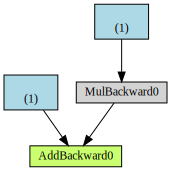

In [42]:
# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train_tensor

# Step 2 - Computes the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error! 
error = (yhat - y_train_tensor)
# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()

# We can try plotting the graph for any python variable: 
# yhat, error, loss...
make_dot(yhat)

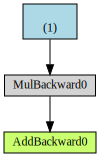

In [43]:
b_nograd = torch.randn(1, requires_grad=False, \
                       dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

yhat = b_nograd + w * x_train_tensor

make_dot(yhat)

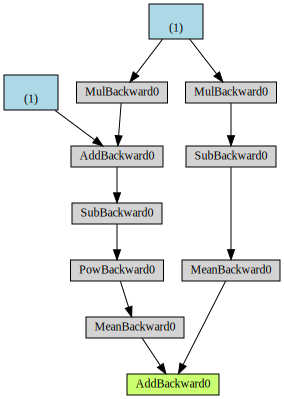

In [44]:
b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

yhat = b + w * x_train_tensor
error = yhat - y_train_tensor
loss = (error ** 2).mean()

# this makes no sense!!
if loss > 0:
    yhat2 = w * x_train_tensor
    error2 = yhat2 - y_train_tensor
    
# neither does this :-)
loss += error2.mean()

make_dot(loss)

# Optimizer

## step / zero_grad

In [45]:
# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

### Cell 1.7

In [46]:
# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train_tensor
    
    # Step 2 - Computes the loss
    # We are using ALL data points, so this is BATCH gradient 
    # descent. How wrong is our model? That's the error! 
    error = (yhat - y_train_tensor)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()
    
    # Step 4 - Updates parameters using gradients and 
    # the learning rate. No more manual update!
    # with torch.no_grad():
    #     b -= lr * b.grad
    #     w -= lr * w.grad
    optimizer.step()
    
    # No more telling Pytorch to let gradients go!
    # b.grad.zero_()
    # w.grad.zero_()
    optimizer.zero_grad()
    
print(b, w)

tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


# Loss

In [47]:
# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')
loss_fn

MSELoss()

In [48]:
# This is a random example to illustrate the loss function
predictions = torch.tensor([0.5, 1.0])
labels = torch.tensor([2.0, 1.3])
loss_fn(predictions, labels)

tensor(1.1700)

### Cell 1.8

In [49]:
# Sets learning rate - this is "eta" ~ the "n"-like
# Greek letter
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train_tensor
    
    # Step 2 - Computes the loss
    # No more manual loss!
    # error = (yhat - y_train_tensor)
    # loss = (error ** 2).mean()
    loss = loss_fn(yhat, y_train_tensor)

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()
    
    # Step 4 - Updates parameters using gradients and
    # the learning rate
    optimizer.step()
    optimizer.zero_grad()
    
print(b, w)

tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


In [50]:
loss

tensor(0.0080, grad_fn=<MseLossBackward>)

In [51]:
loss.cpu().numpy()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [52]:
loss.detach().cpu().numpy()

array(0.00804466, dtype=float32)

In [53]:
print(loss.item(), loss.tolist())

0.008044655434787273 0.008044655434787273


# Model

### Cell 1.9

In [54]:
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # To make "b" and "w" real parameters of the model,
        # we need to wrap them with nn.Parameter
        self.b = nn.Parameter(torch.randn(1,
                                          requires_grad=True, 
                                          dtype=torch.float))
        self.w = nn.Parameter(torch.randn(1, 
                                          requires_grad=True,
                                          dtype=torch.float))
        
    def forward(self, x):
        # Computes the outputs / predictions
        return self.b + self.w * x

## Parameters

In [55]:
torch.manual_seed(42)
# Creates a "dummy" instance of our ManualLinearRegression model
dummy = ManualLinearRegression()
list(dummy.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

## state_dict

In [56]:
dummy.state_dict()

OrderedDict([('b', tensor([0.3367])), ('w', tensor([0.1288]))])

In [57]:
optimizer.state_dict()

{'state': {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}},
 'param_groups': [{'lr': 0.1,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'params': [0, 1]}]}

## device

In [58]:
torch.manual_seed(42)
# Creates a "dummy" instance of our ManualLinearRegression model
# and sends it to the device
dummy = ManualLinearRegression().to(device)

## Forward Pass

### Cell 1.10

In [59]:
# Sets learning rate - this is "eta" ~ the "n"-like
# Greek letter
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
# Now we can create a model and send it at once to the device
model = ManualLinearRegression().to(device)

# Defines a SGD optimizer to update the parameters 
# (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    model.train() # What is this?!?

    # Step 1 - Computes model's predicted output - forward pass
    # No more manual prediction!
    yhat = model(x_train_tensor)
    
    # Step 2 - Computes the loss
    loss = loss_fn(yhat, y_train_tensor)

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()
    
    # Step 4 - Updates parameters using gradients and
    # the learning rate
    optimizer.step()
    optimizer.zero_grad()
    
# We can also inspect its parameters using its state_dict
print(model.state_dict())

OrderedDict([('b', tensor([1.0235])), ('w', tensor([1.9690]))])


## train

In [60]:
## Never forget to include model.train() in your training loop!

## Nested Models

In [61]:
linear = nn.Linear(1, 1)
linear

Linear(in_features=1, out_features=1, bias=True)

In [62]:
linear.state_dict()

OrderedDict([('weight', tensor([[-0.2191]])), ('bias', tensor([0.2018]))])

### Cell 1.11

In [64]:
class MyLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # Instead of our custom parameters, we use a Linear model
        # with single input and single output
        self.linear = nn.Linear(1, 1)
                
    def forward(self, x):
        # Now it only takes a call
        self.linear(x)

In [65]:
torch.manual_seed(42)
dummy = MyLinearRegression().to(device)
list(dummy.parameters())

[Parameter containing:
 tensor([[0.7645]], device='cuda:0', requires_grad=True), Parameter containing:
 tensor([0.8300], device='cuda:0', requires_grad=True)]

In [66]:
dummy.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear.bias', tensor([0.8300], device='cuda:0'))])

## Sequential Models

### Cell 1.12

In [67]:
torch.manual_seed(42)
# Alternatively, you can use a Sequential model
model = nn.Sequential(nn.Linear(1, 1)).to(device)

model.state_dict()

OrderedDict([('0.weight', tensor([[0.7645]], device='cuda:0')),
             ('0.bias', tensor([0.8300], device='cuda:0'))])

## Layers

In [68]:
torch.manual_seed(42)
# Building the model from the figure above
model = nn.Sequential(nn.Linear(3, 5), nn.Linear(5, 1)).to(device)

model.state_dict()

OrderedDict([('0.weight', tensor([[ 0.4414,  0.4792, -0.1353],
                      [ 0.5304, -0.1265,  0.1165],
                      [-0.2811,  0.3391,  0.5090],
                      [-0.4236,  0.5018,  0.1081],
                      [ 0.4266,  0.0782,  0.2784]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0815,  0.4451,  0.0853, -0.2695,  0.1472], device='cuda:0')),
             ('1.weight',
              tensor([[-0.2060, -0.0524, -0.1816,  0.2967, -0.3530]], device='cuda:0')),
             ('1.bias', tensor([-0.2062], device='cuda:0'))])

In [69]:
torch.manual_seed(42)
# Building the model from the figure above
model = nn.Sequential()
model.add_module('layer1', nn.Linear(3, 5))
model.add_module('layer2', nn.Linear(5, 1))
model.to(device)

Sequential(
  (layer1): Linear(in_features=3, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

# Putting It All Together

## Data Preparation

### Data Preparation V0

In [71]:
%%writefile data_preparation/v0.py

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Our data was in Numpy arrays, but we need to transform them
# into PyTorch's Tensors and then we send them to the 
# chosen device
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

Overwriting data_preparation/v0.py


In [72]:
%run -i data_preparation/v0.py

## Model Configurtion

### Model Configuration V0

In [73]:
%%writefile model_configuration/v0.py

# This is redundant now, but it won't be when we introduce
# Datasets...
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1

torch.manual_seed(42)
# Now we can create a model and send it at once to the device
model = nn.Sequential(nn.Linear(1, 1)).to(device)

# Defines a SGD optimizer to update the parameters 
# (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

Overwriting model_configuration/v0.py


In [74]:
%run -i model_configuration/v0.py

## Model Training

### Model Training V0

In [75]:
%%writefile model_training/v0.py

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Sets model to TRAIN mode
    model.train()

    # Step 1 - Computes model's predicted output - forward pass
    yhat = model(x_train_tensor)
    
    # Step 2 - Computes the loss
    loss = loss_fn(yhat, y_train_tensor)

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()
    
    # Step 4 - Updates parameters using gradients and 
    # the learning rate
    optimizer.step()
    optimizer.zero_grad()

Overwriting model_training/v0.py


In [76]:
%run -i model_training/v0.py

In [77]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[1.9690]], device='cuda:0')), ('0.bias', tensor([1.0235], device='cuda:0'))])
